In [46]:
import json


data = []
with open("/Users/owen/Projects/datathon25/OpenDeepSearch_CTB/output/fireworks_ai__accounts__fireworks__models__llama-v3p3-70b-instruct/codeact/test/fireworks_ai__accounts__fireworks__models__llama-v3p3-70b-instruct__codeact__frames_test_set__trial0.jsonl") as f:
    for line in f:
        data.append(json.loads(line.strip()))

print(data[0]["final_grade"] if "final_grade" in data[0] else data[0].keys())

A


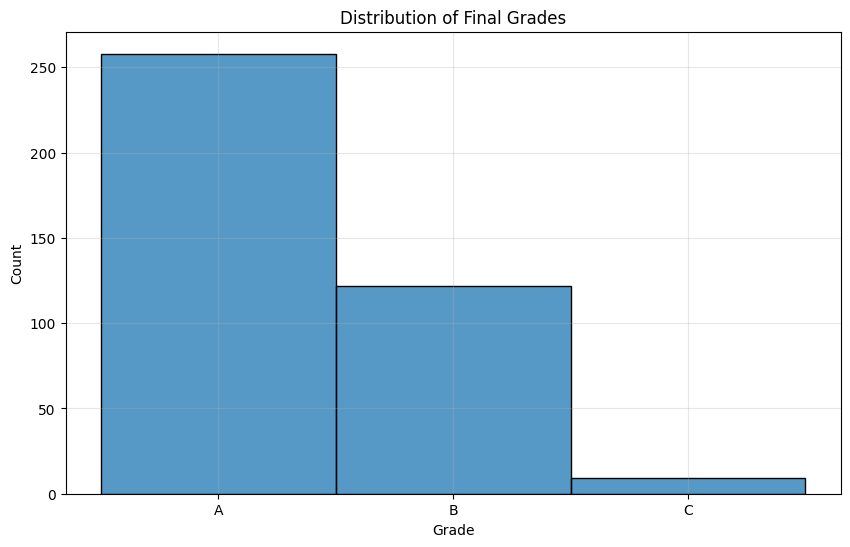


Grade Distribution:
Grade A: 258 samples (66.3%)
Grade B: 122 samples (31.4%)
Grade C: 9 samples (2.3%)


In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert data to DataFrame
df = pd.DataFrame(data)

# Create histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='final_grade', bins=5)
plt.title('Distribution of Final Grades')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3)
plt.show()

# Print grade distribution
grade_dist = df['final_grade'].value_counts()
print("\nGrade Distribution:")
for grade, count in grade_dist.items():
    print(f"Grade {grade}: {count} samples ({count/len(df)*100:.1f}%)")

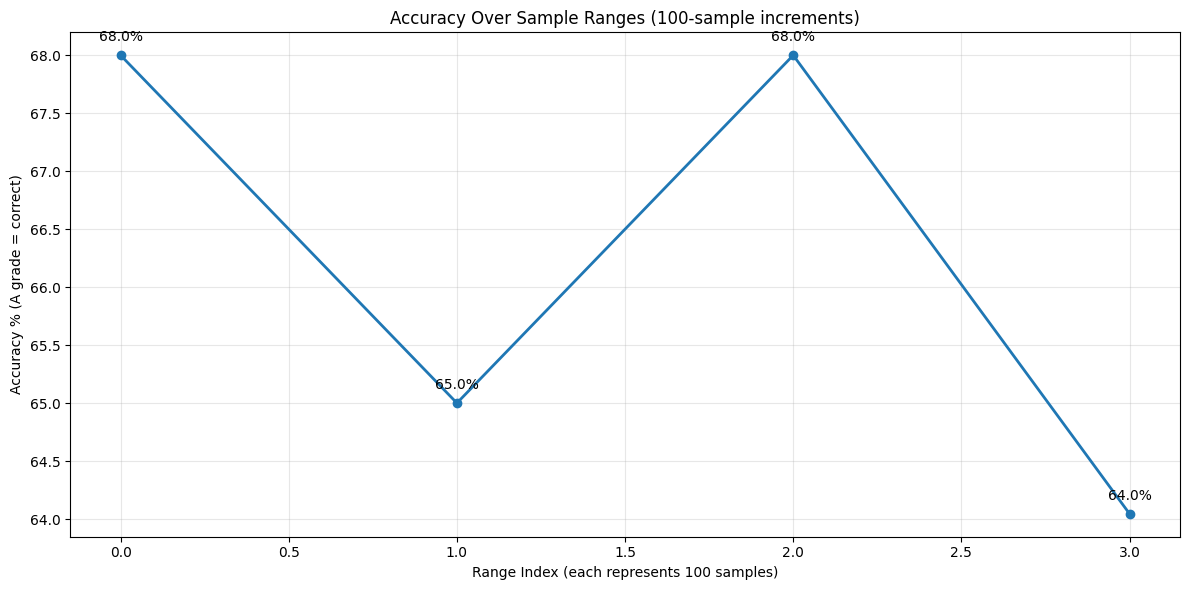


Overall accuracy: 66.3%
Total samples: 389


In [48]:
# Calculate accuracy in 100-sample increments
df['is_correct'] = (df['final_grade'] == 'A').astype(int)
increment = 100
ranges = list(range(0, len(df), increment))
if len(df) % increment != 0:
    ranges.append(len(df))

accuracies = []
for i in range(len(ranges)-1):
    start = ranges[i]
    end = ranges[i+1]
    accuracy = df['is_correct'][start:end].mean() * 100
    accuracies.append(accuracy)

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(range(len(accuracies)), accuracies, 'o-', linewidth=2)
plt.title('Accuracy Over Sample Ranges (100-sample increments)')
plt.xlabel('Range Index (each represents 100 samples)')
plt.ylabel('Accuracy % (A grade = correct)')
plt.grid(True, alpha=0.3)

# Add value labels
for i, acc in enumerate(accuracies):
    plt.annotate(f'{acc:.1f}%', 
                (i, acc),
                textcoords="offset points",
                xytext=(0,10),
                ha='center')

plt.tight_layout()
plt.show()

# Print overall accuracy
print(f"\nOverall accuracy: {df['is_correct'].mean()*100:.1f}%")
print(f"Total samples: {len(df)}")